# Taller 2: Precios de Paltas



![Paltas para todos](https://exoticfruitbox.com/wp-content/uploads/2015/10/aguacate.jpg)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import matplotlib as plt

In [ ]:
!wget https://raw.githubusercontent.com/dianagils/INF-280/main/avocado.csv

--2023-10-05 13:51:28--  https://raw.githubusercontent.com/dianagils/INF-280/main/avocado.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1989197 (1.9M) [text/plain]
Saving to: ‘avocado.csv’

avocado.csv         100%[===================>]   1.90M  --.-KB/s    in 0.07s   

2023-10-05 13:51:29 (27.5 MB/s) - ‘avocado.csv’ saved [1989197/1989197]



In [ ]:
data = pd.read_csv('/content/avocado.csv')

## Parte 1:  Análisis Exploratorio de Datos

Es un hecho bien conocido que los millennials gustan mucho del "avocado toast" o mejor dicho, el pan con palta. Queremos ayudar a los jóvenes a encontrar una ciudad con precios de paltas que puedan pagar. Para ello trabajaremos con este conjunto de datos.

Este conjunto de datos fue descargado del sitio web de la Hass Avocado Board en mayo de 2018 y se compiló en un único archivo CSV. El archivo contienen datos de escaneo minorista semanales de 2018 para el volumen minorista nacional (unidades) y los precios. También se encuentran otros datos como código de búsqueda de los productos, volumén, etc.

## **Analisis de datos**

Para poder trabajar los datos primeros debemos conocer los datos y tipos de datos con los cuales vamos a trabajar, en este caso hemos tomado un Dataset de precios de paltas.

1. Obtenga la cantidad de filas, columnas y tipos de datos que contiene el dataset.

In [ ]:
data.shape
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany



| Nombre | Descripcion  |
|---------|--------------|
| Date | Fecha de observacion  |
| AveragePrice | El precio promedio de cada palta  |
| type | El tipo (conventional or organic)  |
| year | El año  |
| Region | La ciudad o region observada  |  
| Total Volume | El volumen total comprado  |  
| 4046 | El numero total de paltas con codigo PLU 4046  |  
| 4225 | El numero total de paltas con codigo PLU 4225 sold  |  
| 4770 | El numero total de paltas con codigo PLU 4770 sold  |  
| Total Bags | El numero total de bolsas vendidas  |  
| Small Bags	| El numero total de bolsas pequeñas  |  
| Large Bags | El numero total de bolsas grandes  |  
| XLarge Bags | El numero total de bolsas extra grandes  |  


2. Revise la consistencia de la informacion con respecto  a las siguientes definiciones:

> Total Volume = 4046 + 4225 + 4770 + Total Bags

> Total Bags = Small Bags + Large Bags + XLarge Bags

In [ ]:
dataIncorrecta = data[((data['4046'] + data['4225'] + data['4770'] + data['Total Bags']) != data['Total Volume'] ) | ((data['Small Bags'] + data['Large Bags'] + data['XLarge Bags']) != data['Total Bags'] )]
dataCorrecta =  data[((data['4046'] + data['4225'] + data['4770'] + data['Total Bags']) == data['Total Volume'] ) & ((data['Small Bags'] + data['Large Bags'] + data['XLarge Bags']) == data['Total Bags'] )]

dataIncorrecta.reset_index(inplace = True)
dataCorrecta.reset_index(inplace = True)

print("Data Total",data.shape)
print("Data Incorrecta",dataIncorrecta.shape)
print("Data Correcta",dataCorrecta.shape)

Data Total (18249, 14)
Data Incorrecta (8143, 15)
Data Correcta (10106, 15)


In [ ]:
dataCorrecta.isnull().sum()

index           0
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
dataCorrecta['AveragePrice'].max()

3.17

## **Análisis Exploratorio de Datos**
3. Construya un gráfico de barras para comparar la cantidad de paltas vendidas por tipo. ¿Cuál es el tipo más vendido en la muestra?

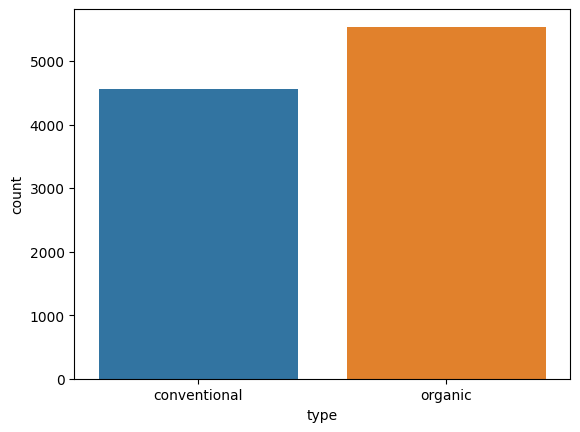

In [ ]:
import matplotlib.pyplot as plt

sns.countplot(data = dataCorrecta, x = 'type')
plt.show()

In [ ]:
freq_by_type = dataCorrecta['type'].value_counts()
freq_rel_by_type = freq_by_type / dataCorrecta['type'].count()

for gender, freq in zip(freq_rel_by_type.index, freq_rel_by_type.values):
    print(f'{gender}: {np.round(freq * 100, 1)} %')

organic: 54.8 %
conventional: 45.2 %


4. Para las paltas *conventional* y *organic*, ¿cuáles es el top 5 de regiones de con más ventas?

In [ ]:
df_paltas_copy = dataCorrecta.copy()
tipo_de_paltas_freq = df_paltas_copy.groupby('type')['region'].value_counts()
for tipo, frecuencias in tipo_de_paltas_freq.groupby(level=0):
    print(f"Frecuencias para el tipo de palta '{tipo}':")
    print(frecuencias.head(5))
    print("\n")

Frecuencias para el tipo de palta 'conventional':
type          region            
conventional  BuffaloRochester      111
              Denver                102
              Charlotte             101
              Nashville             101
              NorthernNewEngland     99
Name: region, dtype: int64


Frecuencias para el tipo de palta 'organic':
type     region            
organic  Albany                126
         NorthernNewEngland    122
         GrandRapids           118
         Houston               118
         MiamiFtLauderdale     116
Name: region, dtype: int64




5. Crea un boxplot que muestre la variación en los precios promedio para cada tipo de palta en las regiones *Houston*, *Seattle* y *Albany*. ¿Existen diferencias significativas entre las regiones? ¿Cúal podría decirse que es la región más cara?


In [ ]:
regiones_seleccionadas = ['Houston', 'Seattle', 'Albany']
df_region_seleccionada = df_paltas_copy[df_paltas_copy['region'].isin(regiones_seleccionadas)]

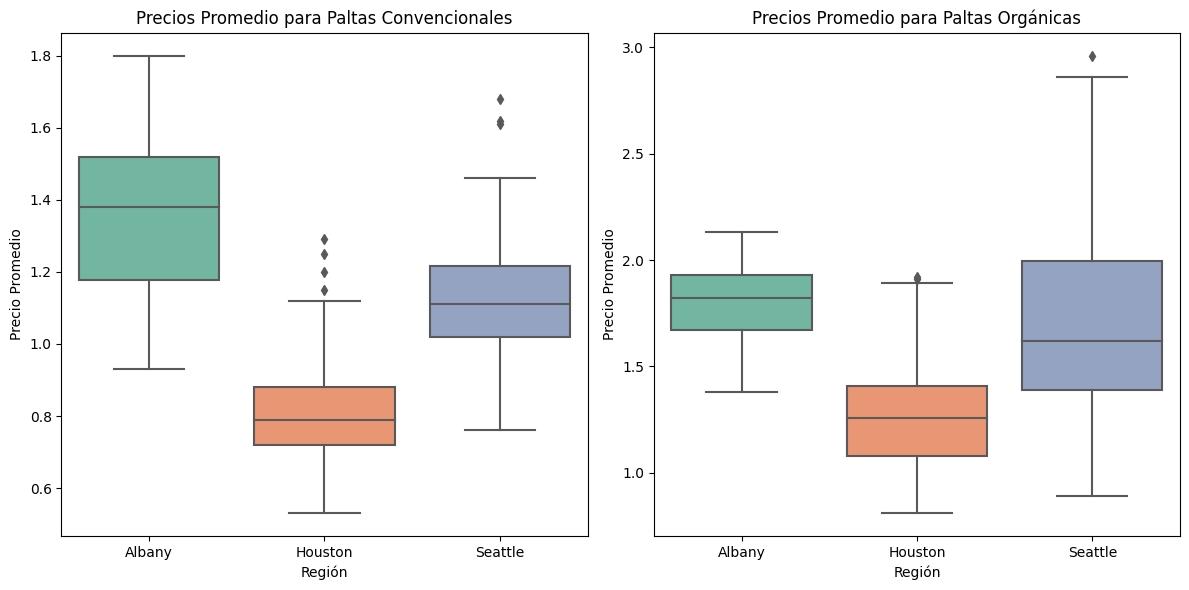

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='region', y='AveragePrice', data=df_region_seleccionada[df_region_seleccionada['type'] == 'conventional'], palette='Set2')
plt.title('Precios Promedio para Paltas Convencionales')
plt.xlabel('Región')
plt.ylabel('Precio Promedio')

plt.subplot(1, 2, 2)
sns.boxplot(x='region', y='AveragePrice', data=df_region_seleccionada[df_region_seleccionada['type'] == 'organic'], palette='Set2')
plt.title('Precios Promedio para Paltas Orgánicas')
plt.xlabel('Región')
plt.ylabel('Precio Promedio')

plt.tight_layout()
plt.show()

6. Compare mediante un histograma el precio promedio de las paltas en las regiones de San Francisco y New York. ¿Qué se puede concluir?

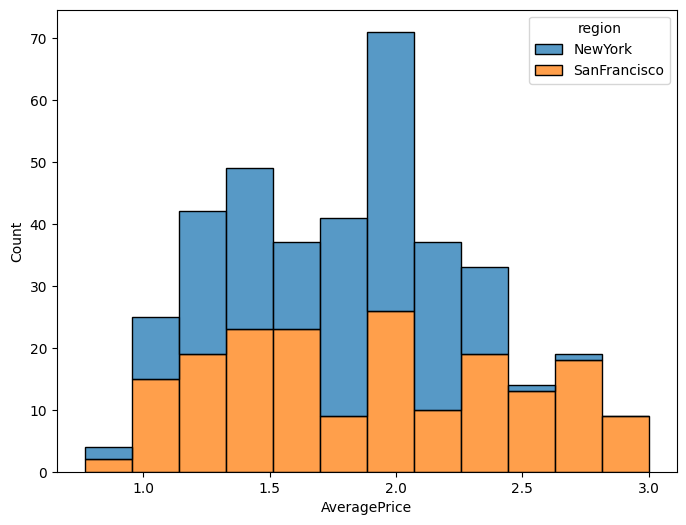

In [ ]:
regiones_a_comparar = ['SanFrancisco', 'NewYork']
df_region_seleccionada = df_paltas_copy[df_paltas_copy['region'].isin(regiones_a_comparar)]

plt.figure(figsize=(8,6))
sns.histplot(data=df_region_seleccionada, x="AveragePrice", hue="region", multiple="stack")
plt.show()

7. El día 31 de Julio es el día nacional de la palta para los norteaméricanos. Investigue sobre las ventas en cuanto a volumen en esas fechas para las 3 regiones seleccionadas. ¿Qué se observa?

In [ ]:
def filtrar_fechas_region(dataframe, regiones):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    filtro = (dataframe['Date'].dt.day == 31) & (dataframe['Date'].dt.month == 7) & (dataframe['region'].isin(regiones))
    dataframe_filtrado = dataframe[filtro]

    return dataframe_filtrado

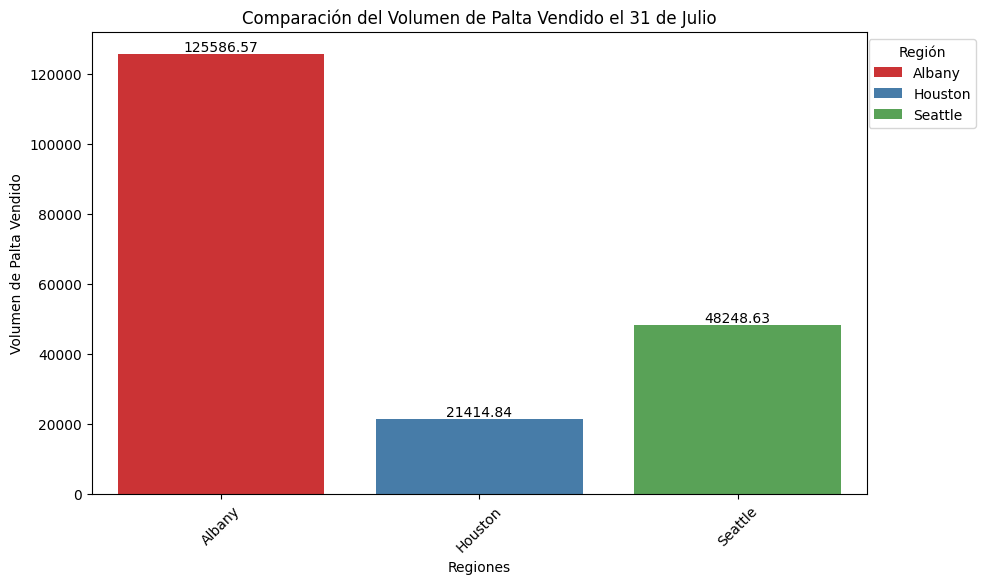

In [ ]:
regiones_interes = ['Houston', 'Seattle', 'Albany']
df_fechas_region_seleccionada = filtrar_fechas_region(df_paltas_copy, regiones_interes)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='region', y='Total Volume', hue='region', data=df_fechas_region_seleccionada, palette='Set1', dodge=False)
plt.title('Comparación del Volumen de Palta Vendido el 31 de Julio')
plt.xlabel('Regiones')
plt.ylabel('Volumen de Palta Vendido')
plt.xticks(rotation=45)
plt.legend(title='Región', loc='upper right', bbox_to_anchor=(1.15, 1))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

## Parte 2: Estimación de parámetros

Sabemos que el estimador insesgado de la media $\mu$, de una población $X$ que se distribuye normal, $X ∼ N(\mu, \sigma^2)$, con algún $\sigma$ conocido, era la media muestral de los datos. Ahora, queremos encontrar el estimador de máxima-verosimilitud para la media de los precios que sigue una distribución normal con probabilidad:

$
\begin{align}f(x | \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}}
\end{align}
$



8. Defina la expresión para el negativo de la log-verosimilitud de la distribución normal (explicitando la expresión matemática) y luego escribala como una función (callable de python).

**NOTA**: Precisar que a continuación se define el negativo de la log-verosimilitud. Esto tiene implicancias en los puntos críticos de la función: los máximos se convierten en mínimos, ya que estamos "dando vuelta" la función.

In [ ]:
def normal_log_likelihood(params, data):
    mu, sigma = params
    log_likelihood = -np.sum(-0.5 * ((data - mu) / sigma)**2 - np.log(sigma) - 0.5 * np.log(2 * np.pi))
    return log_likelihood

9. Grafique la función definida en el paso anterior, considerando el caso unidimensional (1D) y bidimensional (2D). Comente al respecto. ¿Qué podemos observar de ambos gráficos?

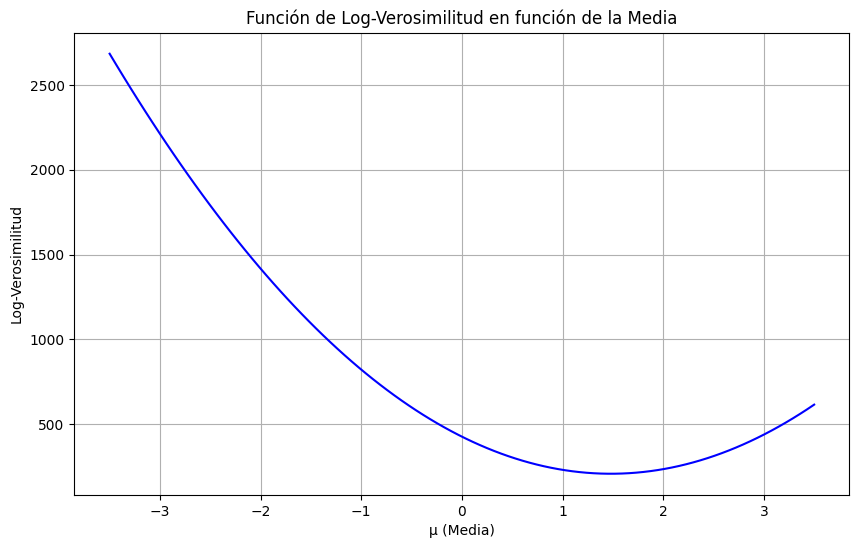

In [ ]:
data = df_paltas_copy['AveragePrice'].sample(200)

mu_values = np.linspace(-3.5, 3.5, 100)
log_likelihood_values = np.zeros_like(mu_values)

for i, mu in enumerate(mu_values):
    params = (mu, 1.0)
    log_likelihood_values[i] = normal_log_likelihood(params, data)

plt.figure(figsize=(10, 6))
plt.plot(mu_values, log_likelihood_values, color='blue')
plt.xlabel('μ (Media)')
plt.ylabel('Log-Verosimilitud')
plt.title('Función de Log-Verosimilitud en función de la Media')
plt.grid(True)
plt.show()


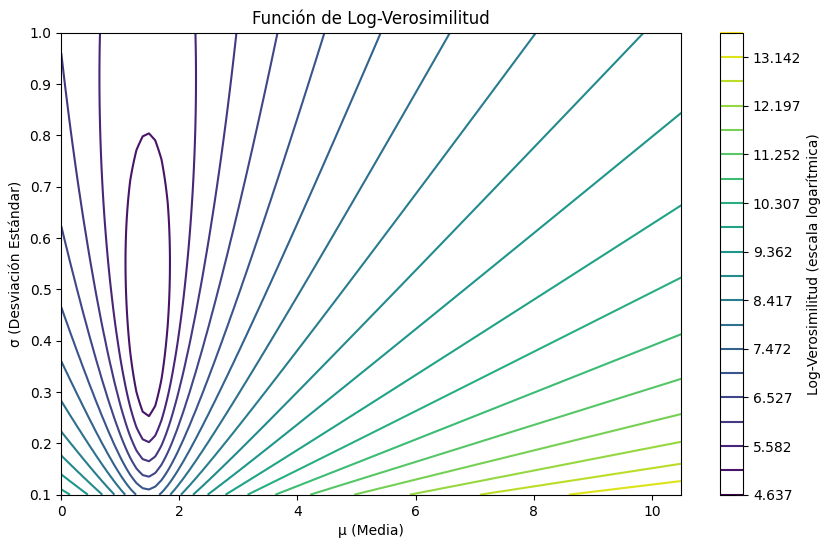

In [ ]:
mu_values = np.linspace(0, 10.5, 100)
sigma_values = np.linspace(0.1, 1, 100)
mu_grid, sigma_grid = np.meshgrid(mu_values, sigma_values)
params_grid = np.stack((mu_grid, sigma_grid), axis=-1)

log_likelihood_values = np.zeros_like(mu_grid)
for i in range(mu_grid.shape[0]):
    for j in range(mu_grid.shape[1]):
        params = (mu_grid[i, j], sigma_grid[i, j])
        log_likelihood_values[i, j] = normal_log_likelihood(params, data)

log_likelihood_values = np.log(log_likelihood_values)

levels = np.linspace(log_likelihood_values.min(), log_likelihood_values.max(), 20)

plt.figure(figsize=(10, 6))
plt.contour(mu_grid, sigma_grid, log_likelihood_values, levels=levels, cmap='viridis')
plt.colorbar(label='Log-Verosimilitud (escala logarítmica)')
plt.xlabel('μ (Media)')
plt.ylabel('σ (Desviación Estándar)')
plt.title('Función de Log-Verosimilitud')
plt.show()

10. Calcule el estimador de la media poblacional µ a través del criterio de Máxima Verosimilitud para la muestra otorgada.

In [ ]:
data = df_paltas_copy['AveragePrice']

mu_inicial = np.mean(data)
sigma_inicial = np.std(data)

result = minimize(normal_log_likelihood, x0=[mu_inicial, sigma_inicial], args=(data,), method='Nelder-Mead')
mu_estimado, sigma_estimado = result.x

print("Estimador de Máxima Verosimilitud (mu):", mu_estimado)

Estimador de Máxima Verosimilitud (mu): 1.4324708094201464


11.  Un QQ plot (Quantile-Quantile plot) es una herramienta gráfica utilizada para comparar los cuantiles teóricos de una distribución con los cuantiles observados de datos reales. En resumen, nos ayuda a evaluar si los datos se ajustan o no a una distribución específica. Crea un QQ plot utilizando los datos de precio promedio de las paltas para determinar si se ajustan a la distribución indicada al inicio de la sección, con los parámetros estimados. Comente acerca del gráfico.

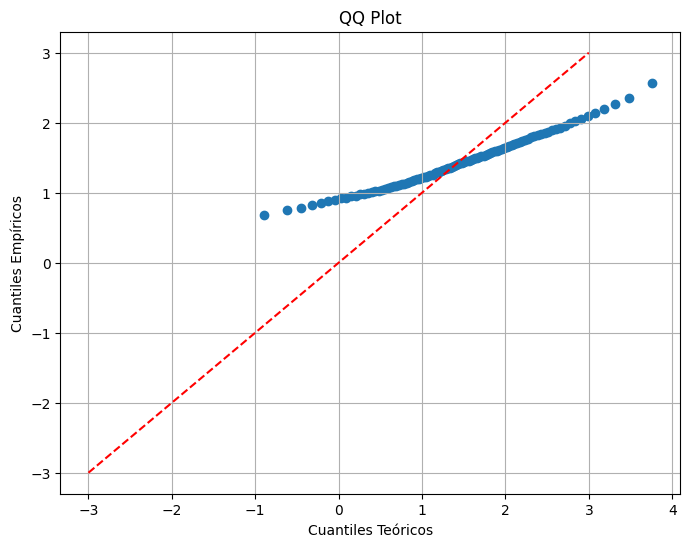

In [ ]:
from scipy.stats import norm
data = df_paltas_copy['AveragePrice']

data_sorted = np.sort(data)

empirical_quantiles = np.percentile(data_sorted, np.arange(0, 100, 1))

empirical_quantiles = np.percentile(data_sorted, np.arange(0, 100, 1))

theoretical_quantiles = norm.ppf(np.arange(0, 100, 1) / 100, loc=mu_estimado)

plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles, empirical_quantiles)
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles Empíricos")
plt.title("QQ Plot")
plt.grid(True)

plt.plot([-3, 3], [-3, 3], linestyle="--", color="red")

plt.show()


12. En el contexto del ajuste de distribuciones estadísticas a datos observados, se pueden utilizar distribuciones con uno o dos parámetros. ¿Por qué podría ser preferible utilizar una distribución con 2 parámetros en lugar de "congelar" uno de ellos a un valor fijo?